In [3]:
conda install -c conda-forge mlxtend

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [4]:
conda install -c conda-forge missingno

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import missingno as msno

In [7]:
path='empresa.csv'
df=pd.read_csv(path)
df.head()

,No,1,1.1,1.2,1.3
0,No,1,1,1,2
1,No,1,1,1,3
2,No,1,1,1,4
3,No,1,1,1,5
4,No,1,1,2,1


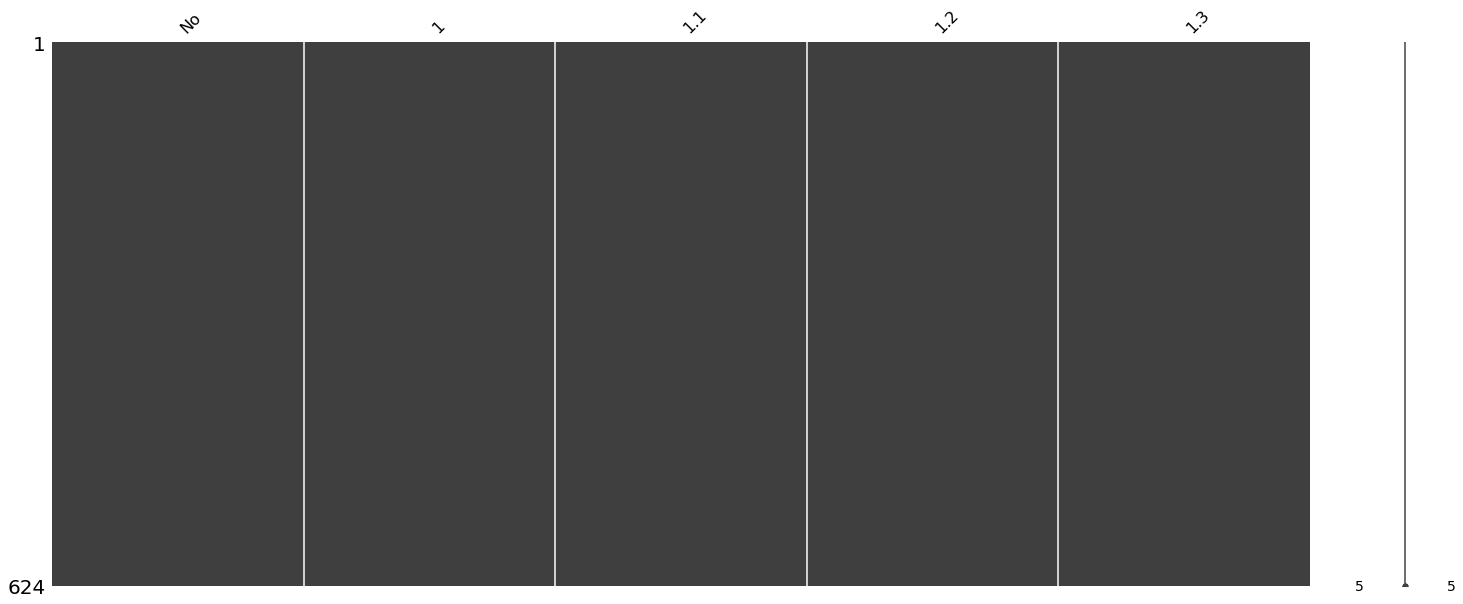

In [8]:
msno.matrix(df)

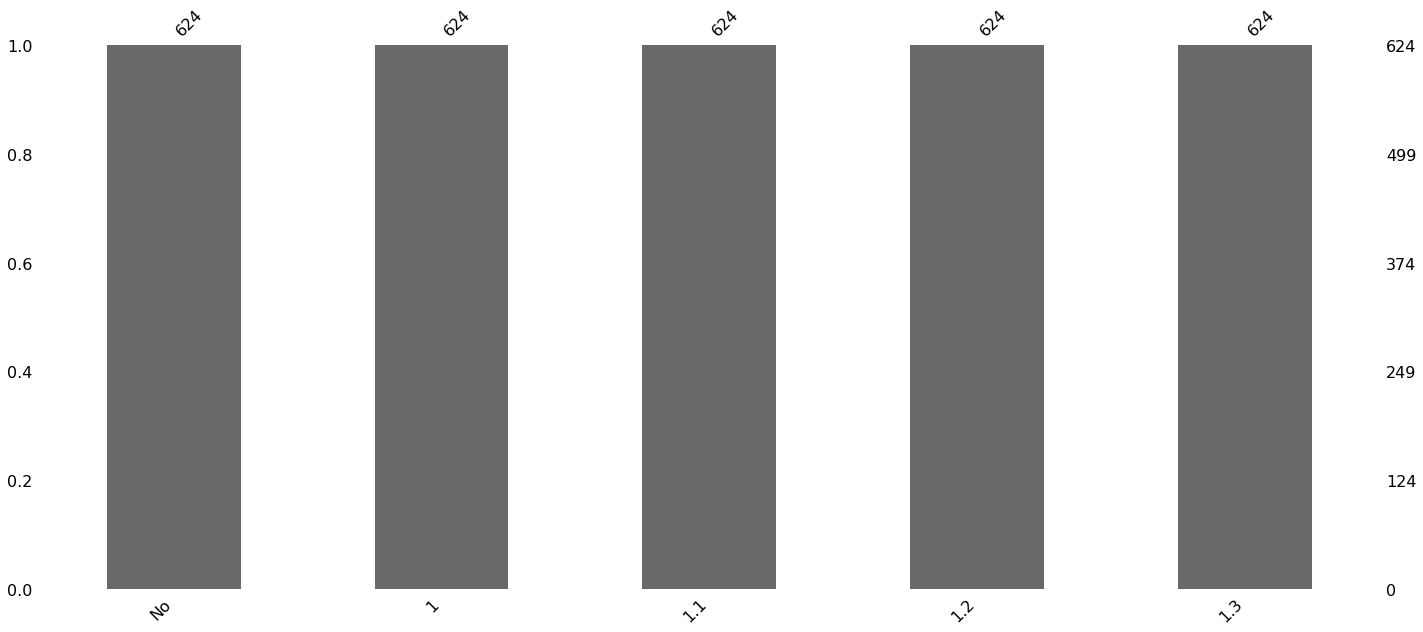

In [9]:
msno.bar(df)

In [11]:
items = (df['No'].unique())
items

array(['No', 'Si'], dtype=object)

In [12]:
encoded_vals = []

for index, row in df.iterrows():
    labels = {}
    uncommons = list(set(items) - set(row))
    commons = list(set(items).intersection(row))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)

In [13]:
ohe_df = pd.DataFrame(encoded_vals)
ohe_df.head()

,No,Si
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [14]:
freq_items = apriori(ohe_df, min_support=0.2, use_colnames=True, verbose=1)
freq_items.head()

Processing 2 combinations | Sampling itemset size 2


,support,itemsets
0,0.546474,(No)
1,0.453526,(Si)


In [15]:
freq_items.itemsets.unique()

array([frozenset({'No'}), frozenset({'Si'})], dtype=object)